# About this project

In this project I'll be using Python to connect to Google Trends API using Pytrends for webscraping, iterate the data collection over the list of keywords and integrate them using a keyword as reference, while visualizing the results with Pandas and Matplotlib. The Keywords are: Business Analysis, Data Science, Data Analysis between January 25-2021 and January 25-2022 in Nigeria.
### Aknowledgement
Before going through this analysis, I'd really appreciate one of my mentor Jonathan Ogwumike. He really motivates me to go on and do more projects with python.

The pytrends API has about nine methods. For this project I’ll be using the following:

- Interest Over Time: returns historical, indexed data for when the keyword was searched most as shown on Google Trends’ Interest Over Time section.
- Interest by Region: returns data for where the keyword is most searched as shown on Google Trends’ Interest by Region section.
- Related Queries: returns data for the related keywords to a provided keyword shown on Google Trends’ Related Queries section.
- Suggestions: returns a list of additional suggested keywords that can be used to refine a trend search.

## importing the library

In [1]:

pip install pytrends

## Building Functions

In [2]:
from pytrends.request import TrendReq

#make a pytrends object to request Google Trends data
pytrends = TrendReq(hl='en-US', tz=360, timeout=(10, 25))
                
#extract data about weekly searches of certain keywords
keywords = ["Business Analysis", "Data Science", "Data Analysis"]
pytrends.build_payload(keywords, timeframe='today 12-m', geo='NG', gprop='')



## Interest Over Time

In [3]:

#store kewords data
data = pytrends.interest_over_time()
data = data.drop('isPartial', axis=1)




# Inspecting the Datasets

In [4]:
print("The dataset has: ", data.shape[0], " columns ")

print("The dataset has: ", data.shape[1], " rows ")



The dataset has:  51  columns 
The dataset has:  3  rows 


In [5]:
data.head(15) #inspecting the head of the Dataset

,Business Analysis,Data Science,Data Analysis
date,,,
2021-01-31,18,36,18
2021-02-07,18,24,30
2021-02-14,36,24,42
2021-02-21,24,12,41
2021-02-28,18,36,36
2021-03-07,23,69,34
2021-03-14,16,22,59
2021-03-21,12,24,72
2021-03-28,18,31,74


In [6]:
data.tail(15) #inspecting the tail of the Dataset

,Business Analysis,Data Science,Data Analysis
date,,,
2021-10-10,29,41,37
2021-10-17,11,30,31
2021-10-24,15,38,38
2021-10-31,12,51,51
2021-11-07,12,24,36
2021-11-14,12,36,61
2021-11-21,16,23,43
2021-11-28,19,31,34
2021-12-05,24,24,20


In [7]:
data.dtypes

Business Analysis    int32
Data Science         int32
Data Analysis        int32
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 2021-01-31 to 2022-01-16
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Business Analysis  51 non-null     int32
 1   Data Science       51 non-null     int32
 2   Data Analysis      51 non-null     int32
dtypes: int32(3)
memory usage: 1020.0 bytes


In [9]:
import matplotlib.pyplot as plt

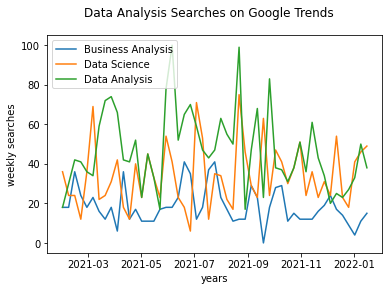

In [10]:
#plot data
plt.plot(data)

#add titles
plt.suptitle('Data Analysis Searches on Google Trends')
plt.xlabel('years')                       
plt.ylabel('weekly searches')  

#add legend
plt.legend(keywords, loc='upper left')

plt.show()



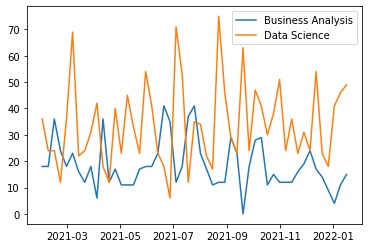

In [11]:
#compain course popularity
focus = ['Business Analysis', 'Data Science'] 

plt.plot(data[focus])
plt.legend(focus)
plt.show()

# Separate Subplots for each Data Colunms

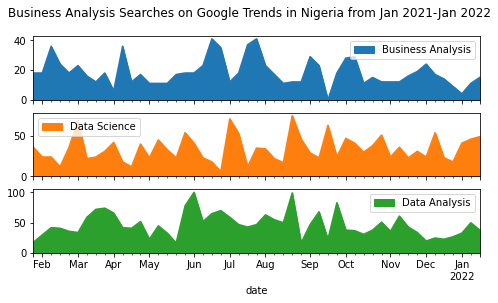

In [13]:
axs = data.plot.area(figsize=(8, 4), subplots=True)
plt.suptitle('Business Analysis Searches on Google Trends in Nigeria from Jan 2021-Jan 2022')
plt.savefig('data_science1.jpg' ,dpi=300, bbox_inches='tight')

Separate subplots for Business Analysis, Data Science and Data Analysis searches on Google in Nigeria from January 2021 - January 2022

# What are the top State searching for it?

In [15]:
import pandas as pd

#extract state-level kewords search data
Top_state= pytrends.interest_by_region(resolution='NG', inc_low_vol=True)

#get states with the highest searches of "Data Science"
data2 = Top_state['Data Science'].nlargest(10)

#convert to dataframe
data2 = data2.to_frame()

data2

,Data Science
geoName,
Ondo,44
Delta,42
Ogun State,42
Oyo,42
Lagos,39
Rivers,36
Edo,33
Federal Capital Territory,32
Enugu,28


# Visualization

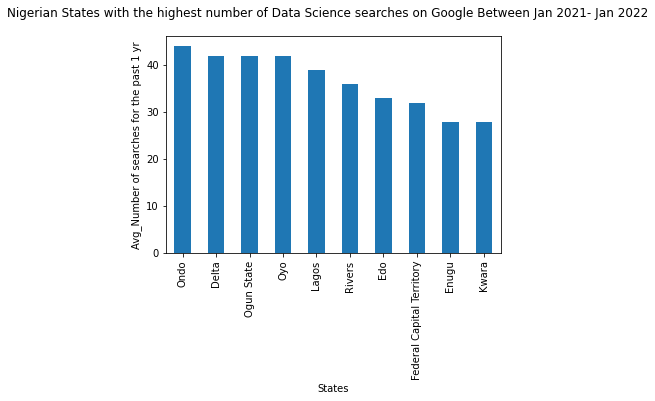

In [16]:
#plot a bar chart
data2.plot(kind='bar', legend=None)

#titles
plt.suptitle('Nigerian States with the highest number of Data Science searches on Google Between Jan 2021- Jan 2022')
plt.ylabel('Avg_Number of searches for the past 1 yr')
plt.xlabel('States')

plt.savefig('data_science2.jpg' ,dpi=300, bbox_inches='tight')
plt.show()


# Plottig Results For Multiple States

In [17]:
data3= pytrends.interest_by_region(resolution='NG', inc_low_vol=True)
data3

,Business Analysis,Data Science,Data Analysis
geoName,,,
Abia,0,0,0
Adamawa,0,0,0
Akwa Ibom,0,0,0
Anambra,0,0,0
Bauchi,0,0,0
Bayelsa,0,0,0
Benue,0,0,0
Borno,0,0,100
Cross River,0,0,0


# Visualizing the above results

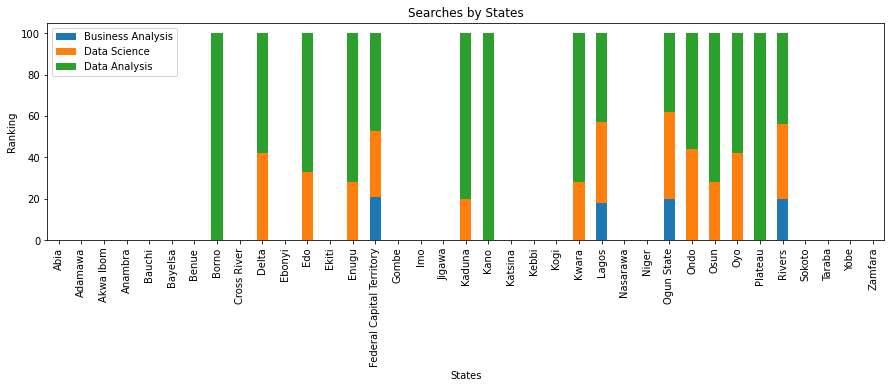

In [19]:


data3 = pytrends.interest_by_region('Business Analysis')

data3.reset_index().plot(x='geoName', y=['Business Analysis', 'Data Science', 'Data Analysis',], kind ='bar', stacked=True, title="Searches by States")

plt.rcParams["figure.figsize"] = [20, 5]
plt.xlabel("States")
plt.ylabel("Ranking")
plt.savefig('data_science3.jpg' ,dpi=300, bbox_inches='tight')
plt.show()


In [20]:
# build the payload
RelatedS= pytrends.build_payload(kw_list=['Data Analysis'], timeframe='today 12-m', geo='NG', gprop='') 

# get related topics
data_relatedkeyword = pytrends.related_topics()

In [21]:
# display top 5 rising results for the Machine Learning keyword
data_relatedkeyword = pytrends.related_topics()
print(data_relatedkeyword['Data Analysis']['top'].head(5)) 

   value formattedValue  hasData  \
0    100            100     True   
1     98             98     True   
2     80             80     True   
3     10             10     True   
4      5              5     True   

                                                link    topic_mid  \
0  /trends/explore?q=/m/026sq&date=today+12-m&geo=NG     /m/026sq   
1  /trends/explore?q=/g/121vr6rm&date=today+12-m&...  /g/121vr6rm   
2  /trends/explore?q=/m/07zy4y&date=today+12-m&ge...    /m/07zy4y   
3  /trends/explore?q=/m/06cs1&date=today+12-m&geo=NG     /m/06cs1   
4  /trends/explore?q=/m/02rf_k8&date=today+12-m&g...   /m/02rf_k8   

       topic_title         topic_type  
0             Data              Topic  
1         Analysis              Topic  
2    Data analysis              Topic  
3         Research  Organization type  
4  Data collection              Topic  


In the ‘rising’ set of results, we can see that Data and Analysis searches are among the top rising topics related to Data Analysis.

Next,lets see the top topics:

In [22]:
# display top 5 top results for the chicken keyword
data_relatedkeyword = pytrends.related_topics()
print(data_relatedkeyword['Data Analysis']['rising'].head(5)) 

    value formattedValue                                               link  \
0  154750       Breakout  /trends/explore?q=/m/04_tv&date=today+12-m&geo=NG   
1  153750       Breakout  /trends/explore?q=/m/03y39&date=today+12-m&geo=NG   
2  128500       Breakout  /trends/explore?q=/m/01m3v&date=today+12-m&geo=NG   
3  103200       Breakout  /trends/explore?q=/m/02gcn9&date=today+12-m&ge...   
4  102800       Breakout  /trends/explore?q=/m/020gjv&date=today+12-m&ge...   

   topic_mid           topic_title topic_type  
0   /m/04_tv            Management      Topic  
1   /m/03y39           Information      Topic  
2   /m/01m3v              Computer      Topic  
3  /m/02gcn9             Analytics      Topic  
4  /m/020gjv  Qualitative research      Topic  


These results are less exciting because the word Data Analysis does not exist in any of the topic_title rows. However, you can see that the topic_type or category changes. To google, these types of searches provide somewhat different results.

## Next, lets look at related queries:

In [23]:
# build the payload
pytrends.build_payload(kw_list=['Data Analysis'], timeframe='today 12-m', geo='NG') 

# get related queries
data2_relatedqueries = pytrends.related_queries()

# display data2_relatedqueries
print(data2_relatedqueries )

{'Data Analysis': {'top':                      query  value
0    what is data analysis    100
1  method of data analysis     31, 'rising':                      query   value
0  method of data analysis  211100
1    what is data analysis     110}}


Like related_topics, related_queries returns a dictionary containing top and rising query results.

## Finally, we can get suggested search keywords as shown below:

In [24]:
# get suggestions
data_suggestedkeywords = pytrends.suggestions('Analysts')

# display data_suggestedkeywords
print(data_suggestedkeywords)

[{'mid': '/g/11bzyq48jx', 'title': 'IBSAT', 'type': 'Admissions exam'}, {'mid': '/m/02h6p2j', 'title': 'Management Analyst', 'type': 'Occupation'}, {'mid': '/m/02h6nfh', 'title': 'Budget Analyst', 'type': 'Occupation'}]


Unlike related_topics and related_queries, suggestions does not require that a payload be built first. Instead, the keyword is passed to the method. The suggestions are just like the “autocomplete” information you get when typing in your search.